# **Adding Liabraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
from google.colab import files

# **Adding And Making A Copy Of Main Dataset**

In [ ]:
df_main = pd.read_csv("/content/Messy_Diabetes_Dataset.csv")
df_copy = df_main.copy()

# **Preprocessing**

## **Data Cleaning**

In [ ]:
df_copy.head(10)

,Age,Gender,BMI,BloodPressure,Glucose,Insulin,SkinThickness,FamilyHistory,Exercise_Occasionally,Exercise_Sometimes,Exercise_Yes,Smoking_Occasionally,Smoking_Yes,Alcohol_Occasionally,Alcohol_Yes,Outcome
0,58,1,18.88,86.91,108.18,100.65,19.92,0,0,0,0,1,0,0,0,0
1,71,1,29.07,79.82,141.40,82.04,3.74,0,1,0,0,0,1,0,0,0
2,94,1,24.09,93.00,101.17,84.45,25.73,1,1,0,0,0,1,0,1,0
3,34,0,21.07,83.38,108.61,82.65,26.68,1,0,0,0,0,1,0,0,0
4,62,1,28.14,80.16,139.29,79.64,27.65,0,0,0,0,1,0,1,0,0
5,27,0,27.21,70.22,120.18,111.64,23.90,0,0,0,0,1,0,1,0,0
6,40,0,26.68,72.76,99.39,97.78,18.34,1,0,0,0,0,1,0,0,0
7,58,0,29.56,80.16,148.98,120.02,8.26,0,0,0,0,0,1,0,1,0
8,77,1,24.53,75.53,147.28,132.43,23.59,0,0,0,0,0,1,0,0,0
9,38,1,28.70,67.08,145.18,100.54,20.31,1,0,0,0,1,0,1,0,1


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            9507 non-null   float64
 1   Gender         10000 non-null  object 
 2   BMI            9505 non-null   float64
 3   BloodPressure  9504 non-null   float64
 4   Glucose        9512 non-null   object 
 5   Insulin        9000 non-null   float64
 6   SkinThickness  9500 non-null   float64
 7   FamilyHistory  10000 non-null  object 
 8   Exercise       10000 non-null  object 
 9   Smoking        10000 non-null  object 
 10  Alcohol        10000 non-null  object 
 11  Outcome        10000 non-null  int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 937.6+ KB


In [ ]:
df_copy.isnull().sum()

,0
Age,493
Gender,0
BMI,495
BloodPressure,496
Glucose,488
Insulin,1000
SkinThickness,500
FamilyHistory,0
Exercise,0
Smoking,0


In [ ]:
df_copy.describe()

,Age,BMI,BloodPressure,Insulin,SkinThickness,Outcome
count,9507.000000,9505.000000,9504.000000,9000.000000,9500.000000,10000.000000
mean,50.260334,28.557961,81.803830,100.508142,20.086299,0.254000
std,17.901314,7.825093,21.457803,50.086280,7.949221,0.435319
min,20.000000,1.128866,28.455308,-98.540730,-10.260924,0.000000
25%,35.000000,24.069648,72.022217,67.200581,14.760066,0.000000
50%,50.000000,28.092171,80.160644,100.415707,20.082860,0.000000
75%,65.000000,32.347895,88.429550,134.098997,25.506502,1.000000
max,119.000000,99.817873,299.000000,275.996312,48.798494,1.000000


### AGE Column

In [ ]:
df_copy['Age'].skew().round(2)

np.float64(0.15)

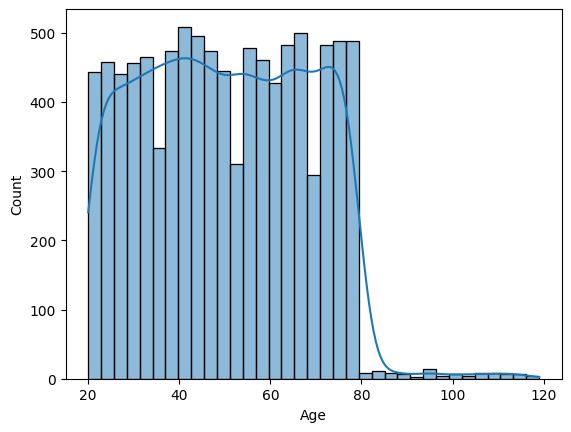

In [ ]:
sns.histplot(df_copy['Age'], kde=True)
plt.show()

In [ ]:
df_copy['Age'].unique()

array([ 58.,  71.,  94.,  34.,  62.,  27.,  40.,  77.,  38.,  42.,  30.,
        43.,  72.,  55.,  59.,  nan,  21.,  63.,  49.,  57.,  79.,  52.,
        31.,  41.,  44.,  68.,  46.,  78.,  61.,  47.,  35.,  66.,  70.,
        74.,  76.,  22.,  56.,  26.,  28.,  37.,  23.,  33.,  69.,  45.,
        39.,  54.,  36.,  25.,  73.,  53.,  29.,  50.,  67.,  64.,  60.,
        48.,  20.,  32.,  51.,  85., 105.,  75.,  24.,  81.,  89., 117.,
        65.,  88.,  90.,  87., 108.,  82., 107.,  83., 115.,  96., 110.,
        93., 103., 102., 119., 106., 113., 109., 100.,  86.,  84.,  98.,
        80., 116., 114.,  95., 101., 112., 111.,  99.,  97.,  91., 104.])

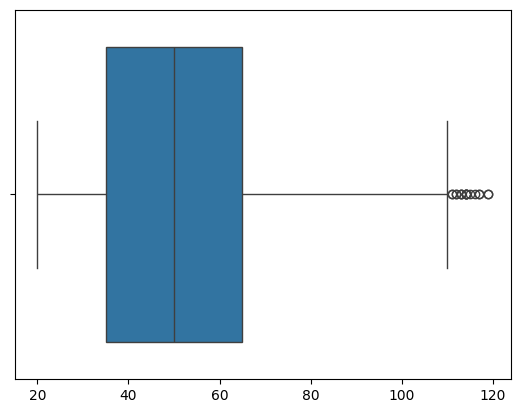

In [ ]:
sns.boxplot(data=df_copy, x=df_copy['Age'].values)
plt.show()

In [ ]:
df_copy['Age'].fillna(df_copy['Age'].median(), inplace=True)


/tmp/ipython-input-2611597100.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Age'].fillna(df_copy['Age'].median(), inplace=True)


In [ ]:
df_copy['Age'] = df_copy['Age'].astype('int')

### Gender Column

In [ ]:
df_copy['Gender'].unique()

array(['M', 'male', 'm', 'F', 'female', 'Female', 'f', 'Male'],
      dtype=object)

In [ ]:
df_copy['Gender'].replace(['M', 'male', 'm', 'Male'], 'Male', inplace = True)
df_copy['Gender'].replace(['F', 'female', 'Female', 'f'], 'Female', inplace = True)

/tmp/ipython-input-3463495818.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Gender'].replace(['M', 'male', 'm', 'Male'], 'Male', inplace = True)


### BMI Column

In [ ]:
df_copy['BMI'].skew().round(2)

np.float64(2.87)

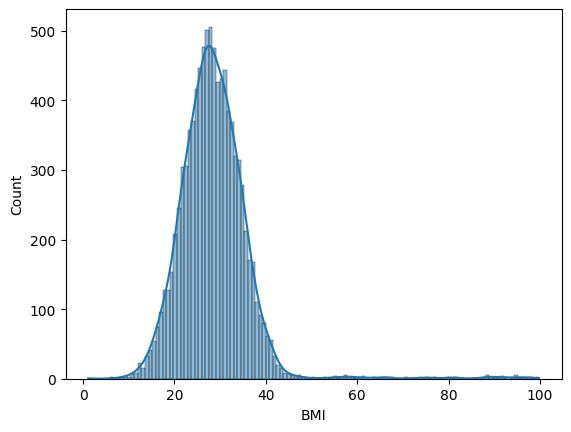

In [ ]:
sns.histplot(df_copy['BMI'], kde = True)
plt.show()

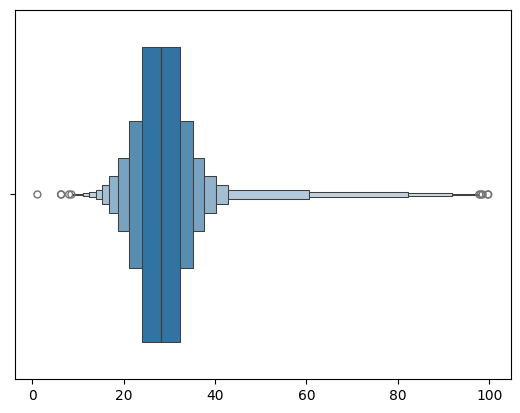

In [ ]:
sns.boxenplot(data = df_copy, x = df_copy['BMI'].values)
plt.show()

In [ ]:
df_copy['BMI'].unique()

array([18.87757691, 29.06512039, 24.09489819, ..., 25.08863146,
       23.7782393 , 23.96930657])

In [ ]:
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

/tmp/ipython-input-2264011331.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)


In [ ]:
df_copy['BMI'] = df_copy['BMI'].round(2)

In [ ]:
df_copy['BMI'].describe()

,BMI
count,10000.000000
mean,28.534819
std,7.629678
min,1.130000
25%,24.290000
50%,28.090000
75%,32.080000
max,99.820000


In [ ]:
df_copy = df_copy[(df_copy['BMI'] >= 10) & (df_copy['BMI'] <= 60)]   # take only those values it comes in range between 10-60 biological range

### BloodPressure Column

In [ ]:
df_copy['BloodPressure'].skew().round(2)

np.float64(5.64)

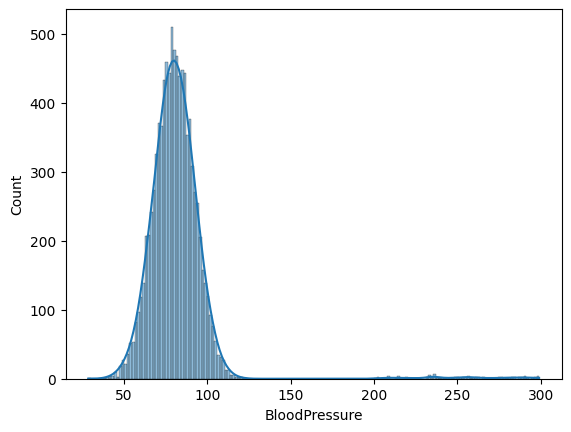

In [ ]:
sns.histplot(df_copy['BloodPressure'], kde = True)
plt.show()

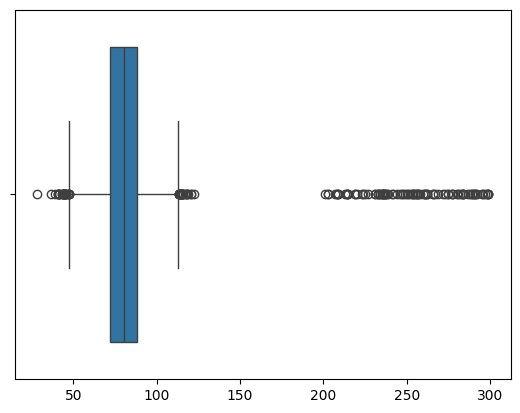

In [ ]:
sns.boxplot(data = df_copy, x = df_copy['BloodPressure'].values)
plt.show()

In [ ]:
df_copy['BloodPressure'].unique()

array([86.90528991, 79.81730449, 92.99801625, ..., 91.82445448,
       72.12265608, 91.84073837])

In [ ]:
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].median(), inplace = True)

/tmp/ipython-input-1880642954.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].median(), inplace = True)


In [ ]:
df_copy['BloodPressure'].describe()

,BloodPressure
count,9913.000000
mean,81.691492
std,20.861314
min,28.455308
25%,72.587426
50%,80.157689
75%,87.862106
max,299.000000


In [ ]:
df_copy = df_copy[(df_copy['BloodPressure'] >= 40) & (df_copy['BloodPressure'] <= 200)]           # take only those values it comes in range between 40-200 biological range.

In [ ]:
df_copy['BloodPressure'] = df_copy['BloodPressure'].round(2)

### Glucose Column

In [ ]:
df_copy['Glucose'] = pd.to_numeric(df_copy['Glucose'], errors='coerce')

In [ ]:
df_copy['Glucose'].skew().round(2)

np.float64(0.0)

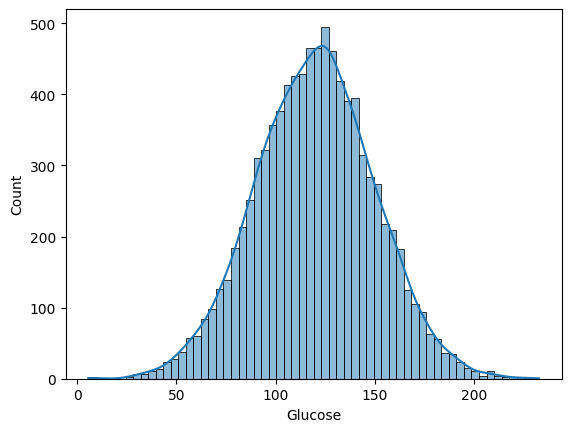

In [ ]:
sns.histplot(df_copy['Glucose'], kde = True)
plt.show()

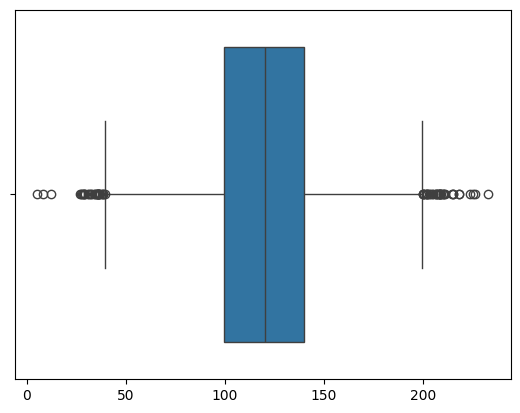

In [ ]:
sns.boxplot(data = df_copy, x = df_copy['Glucose'].values)
plt.show()

In [ ]:
df_copy['Glucose'].unique()

array([108.17781442, 141.40277108, 101.16684544, ...,  58.82394102,
       188.65035761,  95.75860802])

In [ ]:
df_copy['Glucose'].fillna(df_copy['Glucose'].median(), inplace = True)

/tmp/ipython-input-2729515190.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Glucose'].fillna(df_copy['Glucose'].median(), inplace = True)


In [ ]:
df_copy['Glucose'] = df_copy['Glucose'].round(2)

In [ ]:
Q1 = df_copy['Glucose'].quantile(0.25)
Q3 = df_copy['Glucose'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_copy = df_copy[(df_copy['Glucose'] >= lower_bound) & (df_copy['Glucose'] <= upper_bound)]

### Insulin Column

In [ ]:
df_copy['Insulin'].skew().round(2)

np.float64(-0.03)

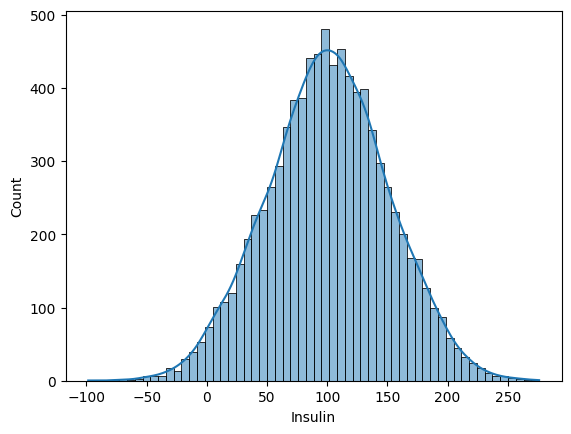

In [ ]:
sns.histplot(df_copy['Insulin'], kde = True)
plt.show()

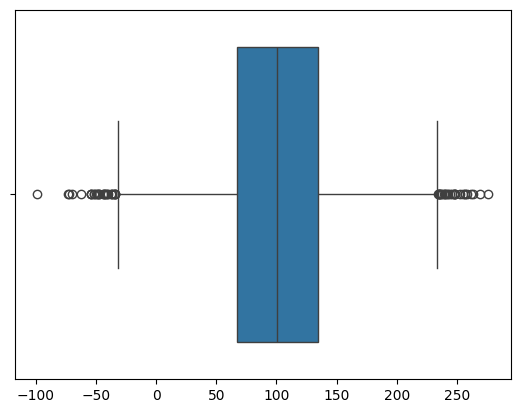

In [ ]:
sns.boxplot(data = df_copy, x = df_copy['Insulin'].values)
plt.show()

In [ ]:
df_copy['Insulin'].unique()

array([         nan,  82.04400396,  84.44588387, ...,  37.33231578,
       248.07238135,  85.26800468])

In [ ]:
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)

/tmp/ipython-input-3097296855.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)


In [ ]:
df_copy['Insulin'] = df_copy['Insulin'].round(2)

In [ ]:
df_copy = df_copy[(df_copy['Insulin'] >= 0) & (df_copy['Insulin'] <= 300)]             # take only those values it comes in range between 0-300 biological range

### SkinThickness Column

In [ ]:
df_copy['SkinThickness'].skew().round(2)

np.float64(-0.01)

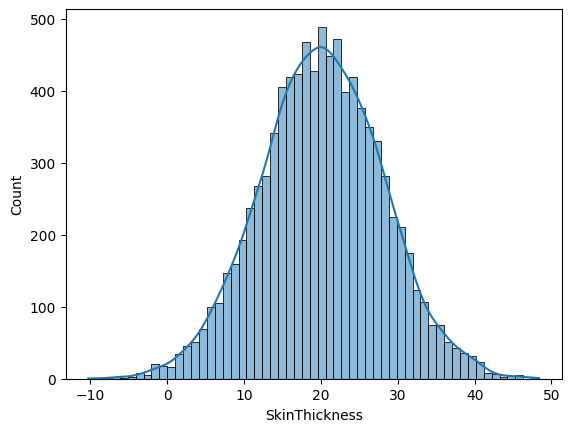

In [ ]:
sns.histplot(df_copy['SkinThickness'], kde = True)
plt.show()

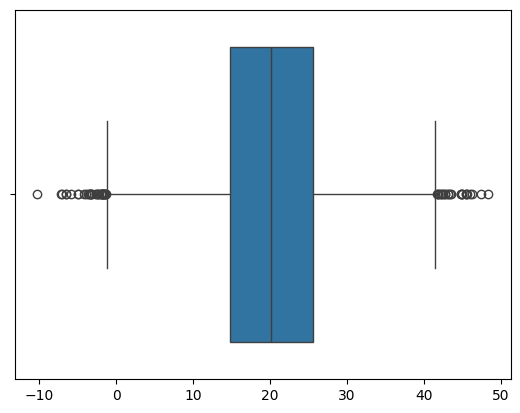

In [ ]:
sns.boxplot(data = df_copy, x = df_copy['SkinThickness'].values)
plt.show()

In [ ]:
df_copy['SkinThickness'].unique()

array([19.91678688,  3.73598671, 25.72672806, ..., 20.66566406,
       27.13001586, 25.60537447])

In [ ]:
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)

/tmp/ipython-input-2437572722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)


In [ ]:
df_copy['SkinThickness'] = df_copy['SkinThickness'].round(2)

In [ ]:
df_copy = df_copy[(df_copy['SkinThickness'] >= 0) & (df_copy['SkinThickness'] <= 80)]

### Family History Column

In [ ]:
df_copy['FamilyHistory'].unique()

array(['n', 'No', 'Y', 'y', 'NO', 'nO', 'Yes', 'N0', 'YES', 'N'],
      dtype=object)

In [ ]:
df_copy['FamilyHistory'].replace(['n', 'No', 'NO', 'nO', 'N0', 'N'], 'No', inplace = True)
df_copy['FamilyHistory'].replace(['Y', 'y', 'Yes', 'YES'], 'Yes', inplace = True)

/tmp/ipython-input-3921785445.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['FamilyHistory'].replace(['n', 'No', 'NO', 'nO', 'N0', 'N'], 'No', inplace = True)


### Excercise Column

In [ ]:
df_copy['Exercise'].unique()

array(['no', 'Occassional', 'Occasionl', 'No', 'Occasionally',
       'Sometimes', 'Yes', 'yes'], dtype=object)

In [ ]:
df_copy['Exercise'].replace(['no', 'No'], 'No', inplace = True)
df_copy['Exercise'].replace(['Occassional', 'Occasionl','Occasionally'], 'Occasionally', inplace = True)
df_copy['Exercise'].replace(['Yes', 'yes'], 'Yes', inplace = True)

/tmp/ipython-input-4255351073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Exercise'].replace(['no', 'No'], 'No', inplace = True)


### Smoking Column

In [ ]:
df_copy['Smoking'].unique()

array(['Occasionally', 'yes', 'Yes', 'Occasionl', 'No', 'no'],
      dtype=object)

In [ ]:
df_copy['Smoking'].replace(['Occasionally', 'Occasionl'], 'Occasionally', inplace = True)
df_copy['Smoking'].replace(['yes', 'Yes'], 'Yes', inplace = True)
df_copy['Smoking'].replace(['No', 'no'], 'No', inplace = True)

/tmp/ipython-input-2461351119.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Smoking'].replace(['Occasionally', 'Occasionl'], 'Occasionally', inplace = True)


### Alcohol Column

In [ ]:
df_copy['Alcohol'].unique()

array(['No', 'Yes', 'no', 'Occasionally', 'yes', 'Occasionl'],
      dtype=object)

In [ ]:
df_copy['Alcohol'].replace(['No', 'no'], 'No', inplace = True)
df_copy['Alcohol'].replace(['Yes', 'yes'], 'Yes', inplace = True)
df_copy['Alcohol'].replace(['Occasionally', 'Occasionl'], 'Occasionally', inplace = True)

/tmp/ipython-input-2180924856.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Alcohol'].replace(['No', 'no'], 'No', inplace = True)


## **Encoding**

### **Gender Column**

In [ ]:
le = LabelEncoder()
df_copy['Gender_encoded'] = le.fit_transform(df_copy['Gender'])       # Convert Gender categories wich is male and female into 0 for male and 1 for female.

In [ ]:
df_copy.columns

Index(['Age', 'Gender', 'BMI', 'BloodPressure', 'Glucose', 'Insulin',
       'SkinThickness', 'FamilyHistory', 'Exercise', 'Smoking', 'Alcohol',
       'Outcome', 'Gender_encoded'],
      dtype='object')

In [ ]:
df_copy.drop('Gender', axis = 1, inplace = True)

In [ ]:
df_copy.rename(columns = {"Gender_encoded":"Gender"}, inplace = True)

In [ ]:
df_copy = df_copy[['Age', 'Gender', 'BMI', 'BloodPressure', 'Glucose', 'Insulin',
       'SkinThickness', 'FamilyHistory', 'Exercise', 'Smoking', 'Alcohol',
       'Outcome']]

### **FamilyHistory Column**

In [ ]:
le = LabelEncoder()
df_copy['FamilyHistory_encoded']= le.fit_transform(df_copy['FamilyHistory'])

In [ ]:
df_copy.drop('FamilyHistory', axis = 1, inplace = True)

In [ ]:
df_copy.rename(columns = {"FamilyHistory_encoded":"FamilyHistory"}, inplace = True)

In [ ]:
df_copy = df_copy[['Age', 'Gender', 'BMI', 'BloodPressure', 'Glucose', 'Insulin',
       'SkinThickness', 'FamilyHistory', 'Exercise', 'Smoking', 'Alcohol',
       'Outcome']]

### **Exercise Column**

In [ ]:
df_copy['Exercise'].unique()

array(['No', 'Occasionally', 'Sometimes', 'Yes'], dtype=object)

In [ ]:
df_copy = pd.get_dummies(data = df_copy, columns = ['Exercise'], drop_first = True, dtype = int)

In [ ]:
df_copy.columns

Index(['Age', 'Gender', 'BMI', 'BloodPressure', 'Glucose', 'Insulin',
       'SkinThickness', 'FamilyHistory', 'Smoking', 'Alcohol', 'Outcome',
       'Exercise_Occasionally', 'Exercise_Sometimes', 'Exercise_Yes'],
      dtype='object')

In [ ]:
df_copy = df_copy[['Age', 'Gender', 'BMI', 'BloodPressure', 'Glucose', 'Insulin',
       'SkinThickness', 'FamilyHistory', 'Exercise_Occasionally', 'Exercise_Sometimes',
       'Exercise_Yes', 'Smoking', 'Alcohol',
       'Outcome']]

### **Smoking Column**

In [ ]:
df_copy['Smoking'].unique()

array(['Occasionally', 'Yes', 'No'], dtype=object)

In [ ]:
df_copy = pd.get_dummies(data = df_copy, columns = ['Smoking'], drop_first = True, dtype = int)

In [ ]:
df_copy = df_copy[['Age', 'Gender', 'BMI', 'BloodPressure', 'Glucose', 'Insulin',
       'SkinThickness', 'FamilyHistory', 'Exercise_Occasionally',
       'Exercise_Sometimes', 'Exercise_Yes', 'Smoking_Occasionally', 'Smoking_Yes', 'Alcohol', 'Outcome']]

### **Alcohol Column**

In [ ]:
df_copy['Alcohol'].unique()

array(['No', 'Yes', 'Occasionally'], dtype=object)

In [ ]:
df_copy = pd.get_dummies(data = df_copy, columns = ['Alcohol'], drop_first = True, dtype = int)

In [ ]:
df_copy = df_copy[['Age', 'Gender', 'BMI', 'BloodPressure', 'Glucose', 'Insulin',
       'SkinThickness', 'FamilyHistory', 'Exercise_Occasionally',
       'Exercise_Sometimes', 'Exercise_Yes', 'Smoking_Occasionally',
       'Smoking_Yes', 'Alcohol_Occasionally', 'Alcohol_Yes', 'Outcome']]

In [ ]:
df_copy.columns

Index(['Age', 'Gender', 'BMI', 'BloodPressure', 'Glucose', 'Insulin',
       'SkinThickness', 'FamilyHistory', 'Exercise_Occasionally',
       'Exercise_Sometimes', 'Exercise_Yes', 'Smoking_Occasionally',
       'Smoking_Yes', 'Alcohol_Occasionally', 'Alcohol_Yes', 'Outcome'],
      dtype='object')

## **Spliting Data Into 80% for train and 20% for test**

In [ ]:
X = df_copy[['Age', 'Gender', 'BMI', 'BloodPressure', 'Glucose', 'Insulin',
       'SkinThickness', 'FamilyHistory', 'Exercise_Occasionally',
       'Exercise_Sometimes', 'Exercise_Yes', 'Smoking_Occasionally',
       'Smoking_Yes', 'Alcohol_Occasionally', 'Alcohol_Yes']]

y = df_copy[['Outcome']]

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


In [ ]:
df_copy["Outcome"].value_counts()     # Model Imbalance

,count
Outcome,
0,7122
1,2313


## **Data Scaling**

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Model Oversampling**

In [ ]:
smote = SMOTE(random_state = 42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
print("Before:", y_train.value_counts())
print("After:", y_train_res.value_counts())

Before: Outcome
0          5724
1          1824
Name: count, dtype: int64
After: Outcome
0          5724
1          5724
Name: count, dtype: int64


## **Building and train Model**

In [ ]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## **Model Prediction and evaluation**

In [ ]:
y_prediction = model.predict(X_test_scaled)
accuracy = round(accuracy_score(y_test, y_prediction),2) * 100
print("Model Accuracy:", accuracy, "%")
Precision = round(precision_score(y_test, y_prediction),2) * 100
print("Model Precision:", Precision, "%")
Recall = round(recall_score(y_test, y_prediction),2) * 100
print("Model Recall:", Recall, "%")
F1_score = round(f1_score(y_test, y_prediction),2) * 100
print("Model F1_score:", F1_score, "%")

cm = confusion_matrix(y_test, y_prediction)
print("Model confusion_matrix:","\n", cm)

Model Accuracy: 88.0 %
Model Precision: 73.0 %
Model Recall: 87.0 %
Model F1_score: 79.0 %
Model confusion_matrix: 
 [[1244  154]
 [  65  424]]


# **Saving Model for deployment**

In [ ]:
joblib.dump(model, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
files.download("diabetes_model.pkl")
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_copy.columns

Index(['Age', 'Gender', 'BMI', 'BloodPressure', 'Glucose', 'Insulin',
       'SkinThickness', 'FamilyHistory', 'Exercise_Occasionally',
       'Exercise_Sometimes', 'Exercise_Yes', 'Smoking_Occasionally',
       'Smoking_Yes', 'Alcohol_Occasionally', 'Alcohol_Yes', 'Outcome'],
      dtype='object')